<a href="https://colab.research.google.com/github/nihish/Reinforcement-learning-rock_paper_scissors_simulator.ipynb/blob/main/rock_paper_scissors_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of rounds per game: 6
Enter the number of games to simulate: 100


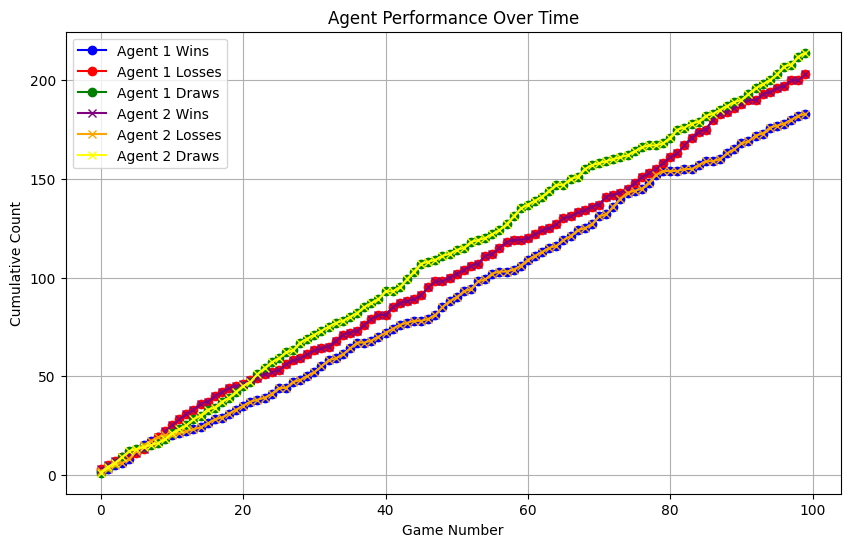


Moves Log:
Round | Agent 1 Move | Agent 2 Move
------------------------------
  1   |    Paper     |   Scissors  
  2   |    Paper     |    Paper    
  3   |     Rock     |    Paper    
  4   |   Scissors   |     Rock    
  5   |     Rock     |   Scissors  
  6   |     Rock     |     Rock    


In [8]:
import random

# Define the moves
MOVES = ["Rock", "Paper", "Scissors"]

# Define the rules
def decide_winner(move1, move2):
    """Decides the winner between two moves."""
    if move1 == move2:
        return 0  # Draw
    elif (move1 == "Rock" and move2 == "Scissors") or \
         (move1 == "Scissors" and move2 == "Paper") or \
         (move1 == "Paper" and move2 == "Rock"):
        return 1  # Player 1 wins
    else:
        return 2  # Player 2 wins


class RandomAgent:
    def make_move(self):
        return random.choice(MOVES)

class TitForTatAgent:
    def __init__(self):
        self.last_opponent_move = random.choice(MOVES)

    def make_move(self):
        return self.last_opponent_move

    def update_opponent_move(self, opponent_move):
        self.last_opponent_move = opponent_move



class RLAgent:
    def __init__(self):
        self.q_table = {move: 0 for move in MOVES}  # Initialize Q-values for each move
        self.epsilon = 0.2  # Exploration rate
        self.learning_rate = 0.1
        self.discount_factor = 0.95

    def make_move(self):
        if random.random() < self.epsilon:  # Explore
            return random.choice(MOVES)
        return max(self.q_table, key=self.q_table.get)  # Exploit

    def update_q_table(self, move, reward):
        self.q_table[move] += self.learning_rate * (reward + self.discount_factor * max(self.q_table.values()) - self.q_table[move])

import matplotlib.pyplot as plt

def simulate_game(agent1, agent2, rounds=10):
    """Simulates a game between two agents, logs moves, and calculates scores."""
    scores = {"Agent 1": 0, "Agent 2": 0, "Draw": 0}
    moves_log = []  # To store moves for each round

    # Track performance over time
    agent1_performance = {"wins": 0, "losses": 0, "draws": 0}
    agent2_performance = {"wins": 0, "losses": 0, "draws": 0}

    for round_num in range(rounds):
        move1 = agent1.make_move()
        move2 = agent2.make_move()
        winner = decide_winner(move1, move2)

        # Log the moves
        moves_log.append((round_num + 1, move1, move2))

        # Update scores and performance logs
        if winner == 1:
            scores["Agent 1"] += 1
            agent1_performance["wins"] += 1
            agent2_performance["losses"] += 1
        elif winner == 2:
            scores["Agent 2"] += 1
            agent2_performance["wins"] += 1
            agent1_performance["losses"] += 1
        else:
            scores["Draw"] += 1
            agent1_performance["draws"] += 1
            agent2_performance["draws"] += 1

        # Update Tit-for-Tat agent's memory
        if isinstance(agent1, TitForTatAgent):
            agent1.update_opponent_move(move2)
        if isinstance(agent2, TitForTatAgent):
            agent2.update_opponent_move(move1)

        # Update RL agents with rewards
        if isinstance(agent1, RLAgent):
            reward = 1 if winner == 1 else -1 if winner == 2 else 0
            agent1.update_q_table(move1, reward)
        if isinstance(agent2, RLAgent):
            reward = 1 if winner == 2 else -1 if winner == 1 else 0
            agent2.update_q_table(move2, reward)

    return scores, moves_log, agent1_performance, agent2_performance



# Ask the user for the number of rounds and games
rounds = int(input("Enter the number of rounds per game: "))
games = int(input("Enter the number of games to simulate: "))

# Create agents
agent1 = RandomAgent()
agent2 = TitForTatAgent()

# Track performance over multiple games
total_agent1_performance = {"wins": [], "losses": [], "draws": []}
total_agent2_performance = {"wins": [], "losses": [], "draws": []}

for game in range(games):
    results, moves_log, agent1_performance, agent2_performance = simulate_game(agent1, agent2, rounds=rounds)

    # Append the performance for this game
    total_agent1_performance["wins"].append(agent1_performance["wins"])
    total_agent1_performance["losses"].append(agent1_performance["losses"])
    total_agent1_performance["draws"].append(agent1_performance["draws"])

    total_agent2_performance["wins"].append(agent2_performance["wins"])
    total_agent2_performance["losses"].append(agent2_performance["losses"])
    total_agent2_performance["draws"].append(agent2_performance["draws"])

# Calculate cumulative performance
cumulative_agent1_wins = [sum(total_agent1_performance["wins"][:i+1]) for i in range(games)]
cumulative_agent2_wins = [sum(total_agent2_performance["wins"][:i+1]) for i in range(games)]

# Plot performance over time
plt.figure(figsize=(10, 6))

# Plot Agent 1 performance (Wins, Losses, Draws)
plt.plot(cumulative_agent1_wins, label="Agent 1 Wins", color="blue", linestyle='-', marker='o')
plt.plot([sum(total_agent1_performance["losses"][:i+1]) for i in range(games)], label="Agent 1 Losses", color="red", linestyle='-', marker='o')
plt.plot([sum(total_agent1_performance["draws"][:i+1]) for i in range(games)], label="Agent 1 Draws", color="green", linestyle='-', marker='o')

# Plot Agent 2 performance (Wins, Losses, Draws)
plt.plot(cumulative_agent2_wins, label="Agent 2 Wins", color="purple", linestyle='-', marker='x')
plt.plot([sum(total_agent2_performance["losses"][:i+1]) for i in range(games)], label="Agent 2 Losses", color="orange", linestyle='-', marker='x')
plt.plot([sum(total_agent2_performance["draws"][:i+1]) for i in range(games)], label="Agent 2 Draws", color="yellow", linestyle='-', marker='x')

# Visualize
plt.title("Agent Performance Over Time")
plt.xlabel("Game Number")
plt.ylabel("Cumulative Count")
plt.legend()
plt.grid(True)

plt.show()

print("\nMoves Log:")
print("Round | Agent 1 Move | Agent 2 Move")
print("-" * 30)
for round_num, move1, move2 in moves_log:
    print(f"{round_num:^5} | {move1:^12} | {move2:^12}")